In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import keras as kr
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from keras.models import Sequential 
from keras.layers import Dense
from keras import backend as K
from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
import random
import autokeras as ak
random.seed(10)

In [55]:
WorkingData = pd.read_csv("Dataset2.csv")

In [56]:
WorkingData = WorkingData.iloc[: , 2:]
WorkingData

,CH4,SF6,HFC,PFC,NO2,CO2
0,98903.81712,136.861720,10444.590890,303.142019,18800.57345,4.165635e+05
1,105111.44760,145.265400,9273.449152,236.002704,19626.06870,4.153397e+05
2,104363.55460,115.357167,9250.631509,202.625537,20800.03484,4.145978e+05
3,102675.20730,117.125146,9218.702440,224.924134,19083.38678,4.109685e+05
4,103029.59930,116.172156,9166.519961,171.323657,19080.91113,4.014993e+05
...,...,...,...,...,...,...
1007,307422.14140,12.647912,15921.050250,17965.003960,72822.53045,1.495694e+06
1008,310366.72600,11.472869,17420.516160,19484.617790,72941.49046,1.507707e+06
1009,309824.22580,11.163929,16409.641350,19481.087040,73404.72712,1.471259e+06
1010,306161.67970,10.154710,14363.665010,20912.457840,71662.09233,1.486301e+06


In [57]:
data = WorkingData.values
scaler = StandardScaler()
X, Y = data[:, 0:5], data[:, 5]
X = scaler.fit_transform(X)
Y= Y.reshape(-1,1)
Y = scaler.fit_transform(Y)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [59]:
train_features = X_train.copy()
test_features = X_test.copy()



In [60]:

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    r2 = 1 - SS_res/(SS_tot + K.epsilon()) 
    return 1 - (((1 - r2) * (X_train.shape[0] - 1)) / (X_train.shape[0] - X_train.shape[1] - 1))

In [61]:
# Initialize the structured data regressor.
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=25,  metrics = ["mse"]
)  # It tries 3 different models.
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    X_train, Y_train,
    # The name of the label column.
   
    epochs=40)


Trial 25 Complete [00h 00m 09s]
val_loss: 0.9093396067619324

Best val_loss So Far: 0.007792391814291477
Total elapsed time: 00h 02m 51s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
23/23 [==============================] - 1s 2ms/step - loss: 0.5013 - mse: 0.5013
Epoch 2/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1782 - mse: 0.1782
Epoch 3/40
23/23 [==============================] - 0s 2ms/step - loss: 0.2173 - mse: 0.2173
Epoch 4/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1377 - mse: 0.1377
Epoch 5/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 6/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1637 - mse: 0.1637
Epoch 7/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1010 - mse: 0.1010
Epoch 8/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 9/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1343 - 

In [48]:
# Predict with the best model.
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
print(reg.evaluate(X_test,Y_test))
r2 = 1 - .0157 / np.var(Y_test)
print(r2)
n = X_test.shape[0]
k = X_test.shape[1]
adjr2 = 1 - (((1 - r2) * (n - 1)) / (n - k - 1))
print(adjr2)

10/10 [==============================] - 0s 4ms/step - loss: 0.0157 - mse: 0.0157
[0.015694325789809227, 0.015694325789809227]
0.9827871265126661
0.9824983199105296


In [54]:
ak_model = reg.export_model()
ak_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 5)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                192       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [20]:
model = Sequential([
      
      Dense(64, activation='tanh'),
      Dense(64, activation='tanh'),
      Dense(64, activation='tanh'),
      Dense(1, activation = "tanh")
  ])

model.compile(loss='mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ['mse', coeff_determination])
model.fit(X_train,Y_train,batch_size=32, epochs = 100, verbose = 0)
model.evaluate(X_test, Y_test)

kfold = KFold(n_splits=5)
cvscores = []
for train, test in kfold.split(X, Y):
    model = Sequential([
          
          Dense(64, activation='tanh'),
          Dense(64, activation='tanh'),
          Dense(64, activation='tanh'),
          Dense(1, activation = "tanh")
      ])
    model.compile(loss='mean_absolute_error',
                    optimizer = tf.keras.optimizers.Adam(0.001),
                    metrics = ['mse', coeff_determination])
    model.fit(X[train], Y[train], epochs=100, batch_size=32, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)

10/10 [==============================] - 0s 4ms/step - loss: 0.1944 - mse: 0.4731 - coeff_determination: 0.5783


[0]
10/10 [==============================] - 0s 3ms/step - loss: 0.3193 - mse: 0.7882 - coeff_determination: 0.3235
[1]
10/10 [==============================] - 0s 4ms/step - loss: 0.4253 - mse: 1.2906 - coeff_determination: -0.2078
[2]
10/10 [==============================] - 0s 3ms/step - loss: 0.4228 - mse: 1.2872 - coeff_determination: -0.1891
[3]
10/10 [==============================] - 0s 4ms/step - loss: 0.2478 - mse: 0.6545 - coeff_determination: 0.5562
[4]
10/10 [==============================] - 0s 4ms/step - loss: 0.2696 - mse: 0.6809 - coeff_determination: 0.4659
[3 0]
10/10 [==============================] - 0s 3ms/step - loss: 0.2316 - mse: 0.6400 - coeff_determination: 0.6033
[3 1]
10/10 [==============================] - 0s 3ms/step - loss: 0.2491 - mse: 0.6558 - coeff_determination: 0.5547
[3 2]
10/10 [==============================] - 0s 3ms/step - loss: 0.2403 - mse: 0.6514 - coeff_determination: 0.5702
[3 4]
10/10 [==============================] - 0s 4ms/step - los

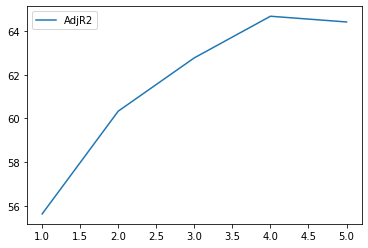

In [21]:
total_k = X_train.shape[1]
n = X_train.shape[0]
ks = list(range(1,total_k + 1))
adjr2 = np.array([])
cvr2 = np.array([])
i_added_array = np.array([])
i_not_added_array = np.array([list(range(total_k))])
i_not_added_array = i_not_added_array.reshape(-1)


adjr2_to_add = -1000
i_added = -1

for k in range(total_k):
    adjr2_to_add = -1000
    i_added = -1
    for i in range(total_k):
        i_this_it = np.array([])
        if np.any(i_not_added_array == i):
            i_this_it = np.append(i_added_array, i)
            i_this_it = i_this_it.astype(int)
            print(i_this_it)
            model = Sequential([
              Dense(64, activation = "tanh"),
              Dense(64, activation = "tanh"),
              Dense(64, activation = "tanh"),
              Dense(1, activation = "tanh")
          ])
            model.compile(loss='mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ['mse', coeff_determination])
            model.fit(X_train[:,i_this_it],Y_train,batch_size=32, epochs = 100,verbose = 0)
            if model.evaluate(X_test[:,i_this_it], Y_test)[2] * 100 > adjr2_to_add:
                adjr2_to_add = model.evaluate(X_test[:,i_this_it], Y_test)[2] * 100
                i_added = i

    adjr2 = np.append(adjr2, adjr2_to_add )
    i_added_array = np.append(i_added_array, i_added)
    i_added_array = i_added_array.astype(int)
    i_to_remove = np.array([i_added])
    i_not_added_array = np.setdiff1d(i_not_added_array, i_added_array)

    kfold = KFold(n_splits=2)
    cvscores = []
    for train, test in kfold.split(X, Y):

        model.fit(X[train][:,i_added_array], Y[train], epochs=100, batch_size=32, verbose=0)
        scores = model.evaluate(X[test][:,i_added_array], Y[test], verbose=0)
        
plt.plot(ks, adjr2, label = "AdjR2")
plt.legend()
plt.show()


In [ ]:
from keras import backend as K


model = Sequential([
      
      Dense(64, activation = "tanh"),
      Dense(1, activation = "tanh")
  ])

model.compile(loss='mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ['mse', coeff_determination])
model.fit(X_train,Y_train,batch_size=32, epochs = 100,verbose = 0)
model.evaluate(X_test, Y_test)

kfold = KFold(n_splits=10)
cvscores = []
for train, test in kfold.split(X, Y):
    model = Sequential([
          
          Dense(64, activation = "tanh"),
        Dense(64, activation = "tanh"),
          Dense(1, activation = "tanh")
      ])
    model.compile(loss='mean_absolute_error',
                    optimizer = tf.keras.optimizers.Adam(0.01),
                    metrics = ['mse', coeff_determination])
    model.fit(X[train], Y[train], epochs=100, batch_size=32, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    cvscores.append(scores[2] * 100)
print("%.2f%%" % (np.mean(cvscores)))

In [ ]:
total_k = X_train.shape[1]
n = X_train.shape[0]
ks = list(range(1,total_k + 1))
adjr2 = np.array([])
cvr2 = np.array([])
i_added_array = np.array([])
i_not_added_array = np.array([list(range(total_k))])
i_not_added_array = i_not_added_array.reshape(-1)


adjr2_to_add = -1000
cvr2_to_add = -1000
i_added = -1

for k in range(total_k):
    adjr2_to_add = -1000
    cvr2_to_add = -1000
    i_added = -1
    for i in range(total_k):
        i_this_it = np.array([])
        if np.any(i_not_added_array == i):
            i_this_it = np.append(i_added_array, i)
            i_this_it = i_this_it.astype(int)
            print(i_this_it)
            model = Sequential([
              Dense(64, activation = "tanh"),
              Dense(64, activation = "tanh"),
              Dense(1, activation = "tanh")
          ])
            model.compile(loss='mean_absolute_error',
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ['mse', coeff_determination])
            model.fit(X_train[:,i_this_it],Y_train,batch_size=32, epochs = 100,verbose = 0)
            if model.evaluate(X_test[:,i_this_it], Y_test)[2] * 100 > adjr2_to_add:
                adjr2_to_add = model.evaluate(X_test[:,i_this_it], Y_test)[2] * 100
                i_added = i

    adjr2 = np.append(adjr2, adjr2_to_add )
    i_added_array = np.append(i_added_array, i_added)
    i_added_array = i_added_array.astype(int)
    i_to_remove = np.array([i_added])
    i_not_added_array = np.setdiff1d(i_not_added_array, i_added_array)

    kfold = KFold(n_splits=10)
    cvscores = []
    for train, test in kfold.split(X, Y):

        model.fit(X[train][:,i_added_array], Y[train], epochs=100, batch_size=32, verbose=0)
        scores = model.evaluate(X[test][:,i_added_array], Y[test], verbose=0)
        cvscores.append(scores[2] * 100)
    cvr2_to_add = np.mean(cvscores)
    cvr2 = np.append(cvr2, cvr2_to_add)
plt.plot(ks, adjr2, label = "AdjR2")
plt.plot(ks, cvr2, label = "CVR2")
plt.legend()
plt.show()
